EC9630 Machine Learning - Laboratory 04

Task : Lab 04                   
Name : H.M.U.C.Herath                    
Reg No : 2021/E/049    
Date : 2025.04.14         
Time : 02:00

# **TASK 01**

# Import libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Read Data

In [58]:
df = pd.read_csv('data.csv')

In [59]:
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 3. Data Preprocessing

In [60]:
# Define column names

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

df.columns = column_names

In [61]:
# apply column names to the dataset
df = pd.read_csv('data.csv', header=None, names=column_names)

In [62]:
df.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [65]:
# check for missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Convert categorical columns to numerical values

In [66]:
from sklearn.preprocessing import LabelEncoder

# Replace ? with NaN and drop rows with missing values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Get categorical columns except 'income'
categorical_cols = df.select_dtypes(include='object').columns.drop('income')

Apply one-hot encoding

In [67]:
# convert income to int
df['income'] = df['income'].str.strip()
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
df['income'] = df['income'].astype(int)

<ipython-input-67-d7b7cec730a3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})


In [68]:
# one hot encoding for features
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Convert income column to binary
df_encoded['income'] = df_encoded['income'].replace({'<=50K': 0, '>50K': 1})

Use Statndared scaller for Scaling

In [69]:
numerical_cols = [
    'age', 'fnlwgt', 'education-num',
    'capital-gain', 'capital-loss', 'hours-per-week'
]

from sklearn.preprocessing import StandardScaler

# Create a copy to avoid modifying the original
df_encoded = df_encoded.copy()

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [70]:
df_encoded.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 4. Divide data into X and Y

In [71]:
X = df_encoded.drop('income', axis=1) # Features
y = df_encoded['income'] # Label/Target

# 5. Split the Data

In [72]:
from sklearn.model_selection import train_test_split

# Split 90% train_val and 10% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Split 70/20 from the 90%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=2/9, random_state=42)

# 6. Implementing an SVM Classifier

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Implementing the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# 7. Train the SVM on the Adult dataset

In [74]:
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = svm_model.predict(X_val)

# Check accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")

Accuracy on validation set: 0.8563


# 8. Visualizing the Decision Boundary and Support Vectors


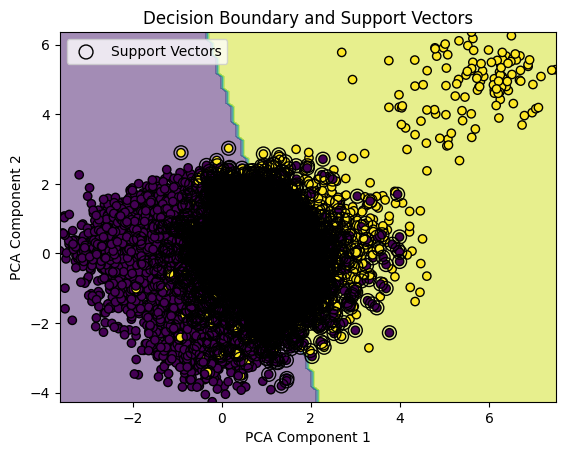

In [75]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize the decision boundary (2D)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_val_2d = pca.transform(X_val)

svm_model_2d = SVC(kernel='linear', random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

# Plotting decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),
                     np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100))

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.scatter(svm_model_2d.support_vectors_[:, 0], svm_model_2d.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Boundary and Support Vectors')
plt.legend()
plt.show()

# 9. Exploring Different Kernel Functions

In [76]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")

Accuracy with linear kernel: 0.8563
Accuracy with poly kernel: 0.8563
Accuracy with rbf kernel: 0.8592


# 10. Evaluating with K-fold Cross Validation and Stratified K-fold Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# K-fold cross-validation
svm_model = SVC(kernel='linear', random_state=42)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)  # Standard k-fold
print(f"K-fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f} = {cv_scores.mean():.4f}")

# Stratified K-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5)
stratified_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=stratified_kfold)
print(f"Stratified K-fold CV Accuracy: {stratified_cv_scores.mean():.4f} ± {stratified_cv_scores.std():.4f} = {stratified_cv_scores.mean():.4f}")

K-fold CV Accuracy: 0.8493 ± 0.0055 = 0.8493
Stratified K-fold CV Accuracy: 0.8493 ± 0.0055 = 0.8493


# **TASK 02**

Read Data of Lab 2

In [78]:
df2 = pd.read_csv('hour.csv')
df2.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [80]:
# Drop unnecessary columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
df2 = df2.drop(columns=columns_to_drop)

In [81]:
# Features and Target
X = df2.drop('cnt', axis=1)  # All columns without 'cnt'
y = df2['cnt']  # Target column

In [82]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.svm import SVR

# Create and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [85]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions with SVR and Linear Regression
y_pred_svr = svr_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the models
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_svr = r2_score(y_test, y_pred_svr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"SVR Model - MSE: {mse_svr:.4f}, R²: {r2_svr:.4f}")
print(f"Linear Regression Model - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

SVR Model - MSE: 20672.9955, R²: 0.3471
Linear Regression Model - MSE: 19379.8284, R²: 0.3880


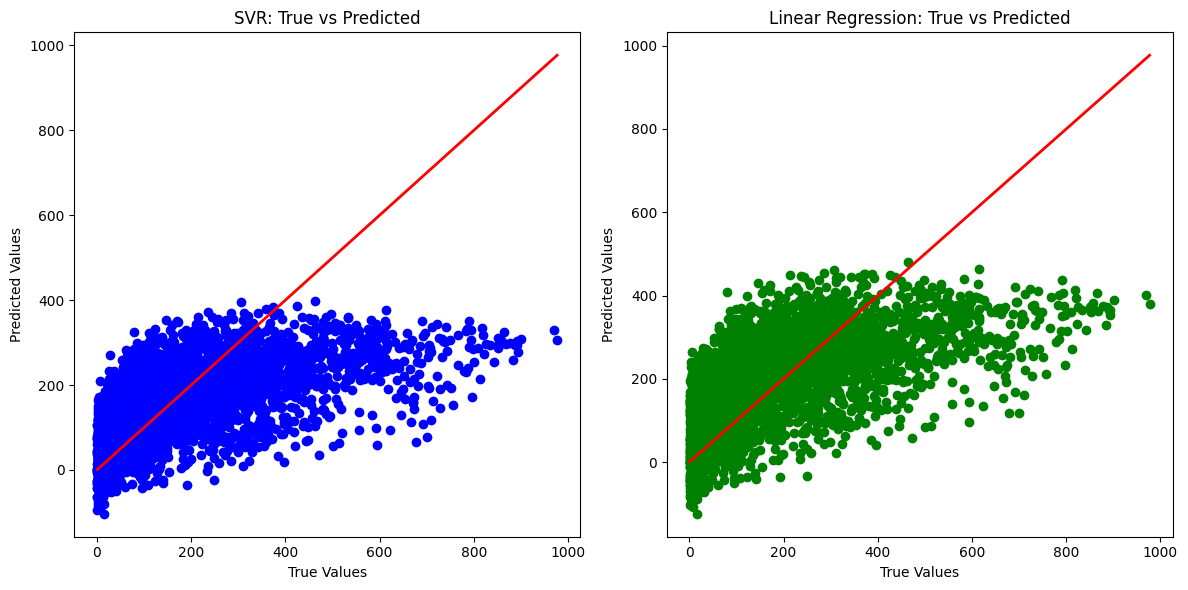

In [87]:
# Plotting the true values vs predicted values for both models
plt.figure(figsize=(12, 6))

# SVR model predictions vs true values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('SVR: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Linear Regression model predictions vs true values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

##  Comparison of Task 1 and Task 2 Results

###Task 1: SVM for Classification (Adult Dataset)

Accuracies

Linear     - 0.8563   
Polynomial - 0.8563   
RBF        - 0.8592   

**(Good)**

-----

###Task 2 : SVM for Regression (Bike Sharing Dataset)

Mean Squared Error (MSE) and R² Score

For SVR                                
MSE = 20672.9955 and R² Score = 0.3471

For Linear Regression                  
MSE = 19379.8284 and R² Score = 0.3880  

**(Too High values)**

---

Summary :

- SVM performed well in classification tasks, achieving high accuracy across kernels.
- In regression, SVM(SVR) performed reasonably but was slightly less effective than linear regression.
- This comparison highlights how model performance can vary based on the type of task (classification vs regression) and dataset characteristics.
